In [4]:
#Importing the libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data
filepath = "D:/DataScience/Exercises/Python/IRIS/data.csv"
data = pd.read_csv(filepath, header = None)
data.columns = ['sepal_lenght','sepal_width','petal_length','petal_width','Category']
data.head()

,sepal_lenght,sepal_width,petal_length,petal_width,Category
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


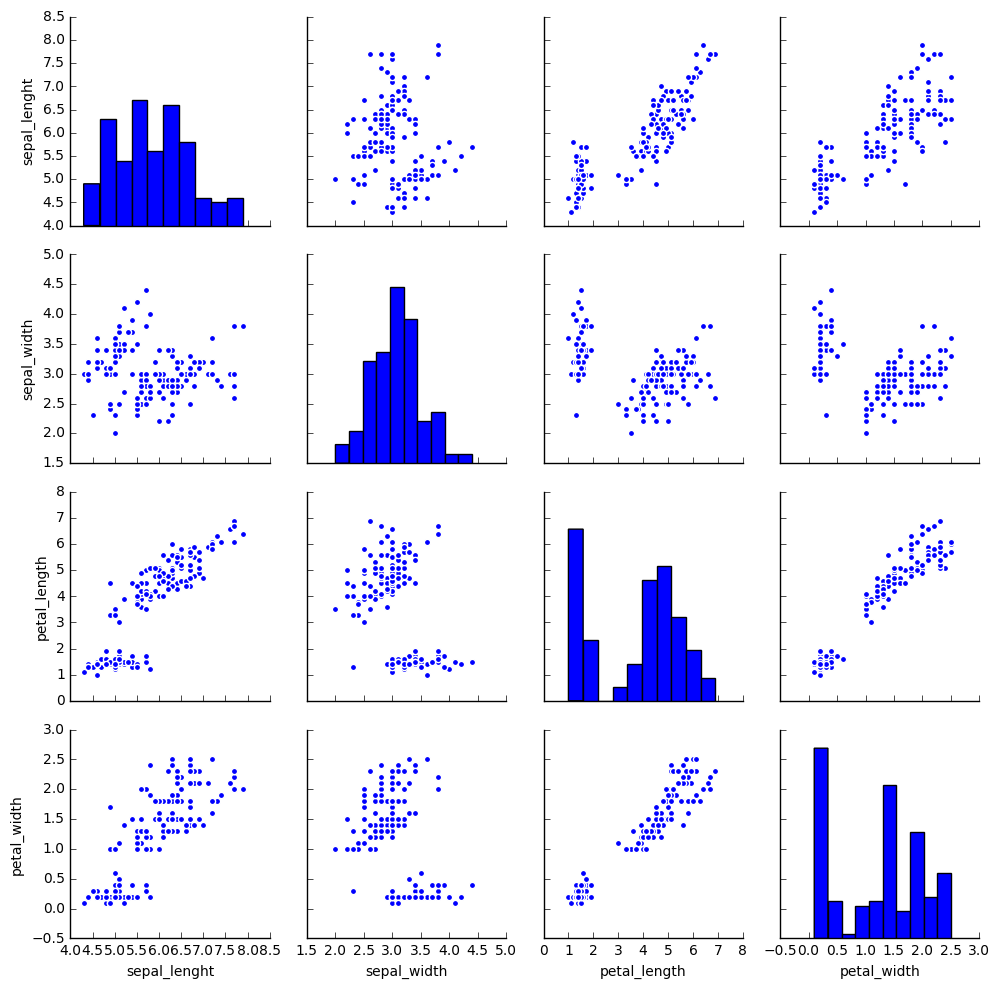

In [5]:
#Plotting the curves
sns.pairplot(data)

In [6]:
#Seperating IV and DV
X = data.iloc[:,:4]
y = data['Category']

In [8]:
#Splitting dataset in train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [11]:
from sklearn import metrics
acc_log = round(metrics.accuracy_score(y_test,y_pred_log),3)

In [12]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
k_range  = range(5,21)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    acc_knn = round(metrics.accuracy_score(y_test,y_pred_knn),3)
    scores.append(acc_knn)

In [13]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = round(metrics.accuracy_score(y_test,y_pred_knn),3)  

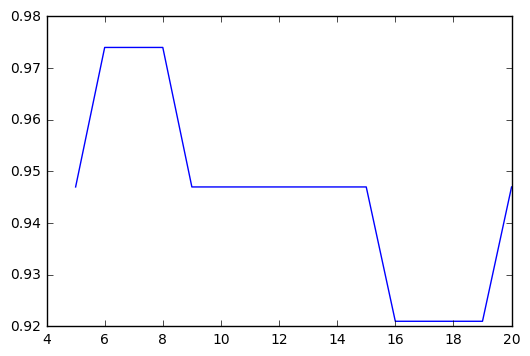

In [14]:
#plotting accuracy vs k-value plot
plt.plot(k_range,scores)

In [15]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_leaf_nodes=4)
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

In [16]:
acc_dtc = round(metrics.accuracy_score(y_test,y_pred_dtc),3)

In [17]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(n_estimators=5,criterion='entropy')
rdf.fit(X_train, y_train)
y_pred_rdf = rdf.predict(X_test)

C:\Users\justAKASH\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [18]:
acc_rdf = round(metrics.accuracy_score(y_test,y_pred_rdf),3)

In [19]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)

In [20]:
acc_nb = metrics.accuracy_score(y_test,y_pred_nb)

In [21]:
#SVM
from sklearn.svm import SVC
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)
y_pred_svc = svc_linear.predict(X_test)

In [22]:
acc_svc_linear = metrics.accuracy_score(y_test, y_pred_svc)

In [23]:
#kernel SVM
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
y_pred_svc = svc_rbf.predict(X_test)

In [24]:
acc_svc_rbf = metrics.accuracy_score(y_test, y_pred_svc)

In [25]:
#Applying XGBoost
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train,y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

C:\Users\justAKASH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [26]:
acc_svc_xgb = metrics.accuracy_score(y_test, y_pred_xgb)

In [32]:
#Applyying Grid Search
'''
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[1,10,100,1000], 'kernel':['linear']},
              {'C':[1,10,100,1000], 'kernel':['rbf'], 
              'gamma':[0.5,0.1,0.01,0.001]}]
grid_search = GridSearchCV(estimator = xgb_classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv=10)
grid_search.fit(X_train, y_train)
y_pred_grid = grid_search.predict(X_test)
'''

"\nfrom sklearn.model_selection import GridSearchCV\nparameters = [{'C':[1,10,100,1000], 'kernel':['linear']},\n              {'C':[1,10,100,1000], 'kernel':['rbf'], \n              'gamma':[0.5,0.1,0.01,0.001]}]\ngrid_search = GridSearchCV(estimator = xgb_classifier,\n                           param_grid = parameters,\n                           scoring = 'accuracy',\n                           cv=10)\ngrid_search.fit(X_train, y_train)\ny_pred_grid = grid_search.predict(X_test)\n"

In [33]:
'''
acc_svc_grid = metrics.accuracy_score(y_test, y_pred_grid)
best_accuracy = grid_search.best_score_
best_parameter = grid_search.best_params_
'''

'\nacc_svc_grid = metrics.accuracy_score(y_test, y_pred_grid)\nbest_accuracy = grid_search.best_score_\nbest_parameter = grid_search.best_params_\n'

In [34]:
print(acc_log,acc_knn,acc_dtc,acc_rdf,acc_nb,
      acc_svc_linear,acc_svc_rbf,acc_svc_xgb)

0.921 0.974 0.974 0.947 0.9473684210526315 0.9473684210526315 0.9473684210526315 0.9736842105263158


In [46]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cvs_log_reg = cross_val_score(log_reg,X,y,cv=10).mean()
cvs_knn = cross_val_score(knn,X,y,cv=10).mean()
cvs_dtc = cross_val_score(dtc,X,y,cv=10).mean()
cvs_rdf = cross_val_score(rdf,X,y,cv=10).mean()
cvs_naive_bayes = cross_val_score(naive_bayes,X,y,cv=10).mean()
cvs_svc_linear = cross_val_score(svc_linear,X,y,cv=10).mean()
cvs_svc_rbf = cross_val_score(svc_rbf,X,y,cv=10).mean()
#cvs_xgb = cross_val_score(xgb_classifier,X,y,cv=10).mean()
#cvs_grid_search = cross_val_score(grid_search,X,y,cv=10).mean()

In [47]:
print(cvs_log_reg,cvs_knn,cvs_dtc,cvs_rdf,cvs_naive_bayes,
      cvs_svc_linear,cvs_svc_rbf)

0.9533333333333334 0.9666666666666668 0.9666666666666666 0.9666666666666666 0.9533333333333334 0.9733333333333334 0.9800000000000001


In [49]:
'''
#Plotting ROC curve
fpr,tpr,thresholds = metrics.roc_curve(y_test, knn.predict_proba(X_test))
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for SVC rbf classifier')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.grid(True)
'''

"\n#Plotting ROC curve\nfpr,tpr,thresholds = metrics.roc_curve(y_test, knn.predict_proba(X_test))\nplt.plot(fpr,tpr)\nplt.xlim([0.0,1.0])\nplt.ylim([0.0,1.0])\nplt.title('ROC Curve for SVC rbf classifier')\nplt.xlabel('False Positive Rate(1-Specificity)')\nplt.ylabel('True Positive Rate(Sensitivity)')\nplt.grid(True)\n"